In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../input/stock-prices/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.shape

(619040, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [8]:
df['volume'] = df['volume'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  float64       
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 33.1+ MB


In [10]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
df.shape

(619029, 7)

In [14]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [15]:
df.Name.unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [16]:
df.Name.unique().size

505

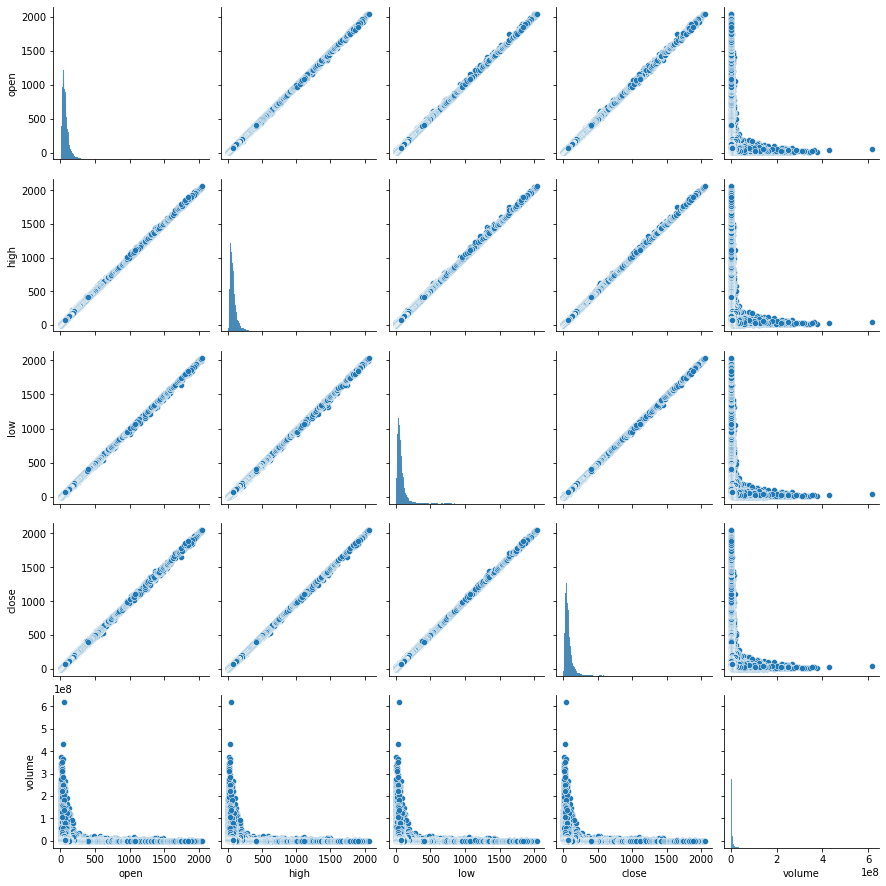

In [17]:
sns.pairplot(df)

In [18]:
df.groupby('Name').mean()

,open,high,low,close,volume
Name,,,,,
A,49.187863,49.600059,48.782026,49.202025,2.338039e+06
AAL,38.390495,38.955554,37.825605,38.393252,9.390321e+06
AAP,132.439631,133.818297,131.036025,132.433463,1.078043e+06
AAPL,109.055429,109.951118,108.141589,109.066698,5.404790e+07
ABBV,60.802801,61.474133,60.177275,60.864440,7.870683e+06
...,...,...,...,...,...
XYL,41.415473,41.763885,41.076026,41.434095,1.183141e+06
YUM,75.422099,76.027123,74.844914,75.451009,3.209032e+06
ZBH,105.542014,106.419854,104.698038,105.606291,1.297144e+06


In [19]:
df['Name'].value_counts()

ZTS     1259
WAT     1259
SNA     1259
SBUX    1259
ZBH     1259
        ... 
DXC      215
BHGE     152
BHF      142
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

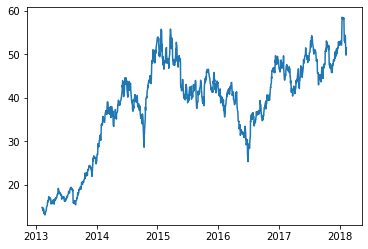

In [20]:
def stocks(name):
    a = df[df['Name']==name]
    a = a.set_index('date')
    plt.plot(a['close'])
    
stocks('AAL')

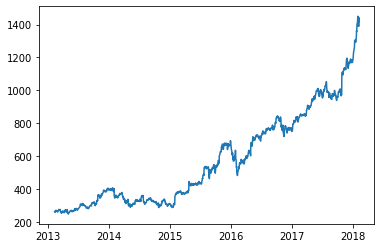

In [21]:
def stocks(name):
    a = df[df['Name']==name]
    a = a.set_index('date')
    plt.plot(a['close'])
    
stocks('AMZN')

In [22]:
# Z score
from scipy import stats

z = np.abs(stats.zscore(df['close']))
print(z)

[0.70124368 0.70422144 0.70617238 ... 0.0946033  0.10035344 0.09429525]


In [23]:
import numpy as np
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    # print(mean, std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_zscore(df['close'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [376.64, 381.37, 386.71, 393.62, 392.3, 384.66, 385.96, 384.49, 386.95, 384.89, 387.78, 382.19, 381.25, 384.24, 388.97, 387.65, 395.96, 395.19, 402.2, 402.92, 399.2, 404.39, 398.08, 393.37, 398.79, 397.97, 396.44, 393.63, 398.03, 401.92, 401.01, 397.66, 390.98, 397.54, 395.87, 395.8, 399.61, 407.05, 404.54, 399.87, 387.6, 386.28, 394.43, 384.2, 403.01, 378.77, 377.17, 381.83, 375.43, 378.995, 383.66, 380.14, 378.59, 385.37, 384.8, 380.16, 385.655, 384.61, 382.72, 387.83, 380.09, 378.56, 378.49, 377.04, 381.2, 383.54, 382.65, 382.36, 385.11, 383.45, 386.04, 375.56, 389.51, 391.18, 389.8, 389.99, 445.1, 438.56, 429.31, 429.37, 421.78, 422.87, 423.04, 421.19, 419.1, 426.88, 433.69, 432.85, 431.02, 426.87, 432.28, 426.0, 425.24, 421.71, 423.86, 431.63, 427.63, 425.47, 431.42, 426.57, 429.23, 430.92, 430.99, 436.59, 430.78, 426.95, 423.5, 425.48, 430.77, 432.97, 429.92, 423.67, 427.26, 427.81, 439.39, 434.92, 436.29, 445.99, 440.84, 440.1, 438.1, 429.86, 434.

<AxesSubplot:xlabel='close'>

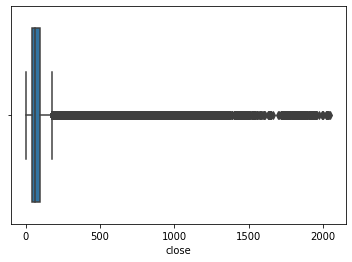

In [24]:
sns.boxplot(df['close'])

In [25]:
Q1 = df['close'].quantile(0.45)
Q3 = df['close'].quantile(0.55)
print(Q1,Q3)
iqr=Q3-Q1
iqr

57.47999999999999 67.71


10.230000000000004

In [26]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

83.055 72.82499999999999


In [27]:
df1 = df[df['close']<upper]
df1.shape

(423200, 7)

<AxesSubplot:xlabel='close'>

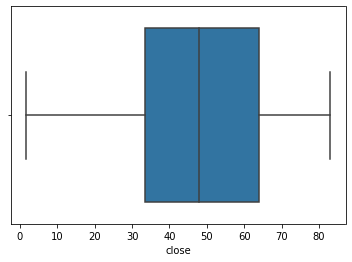

In [28]:
sns.boxplot(df1['close'])

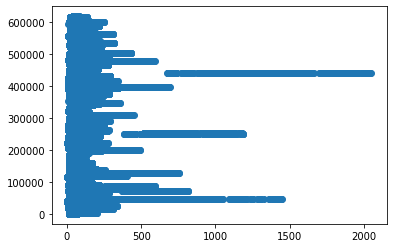

In [29]:
plt.scatter(df['close'],df.index)

<AxesSubplot:xlabel='open'>

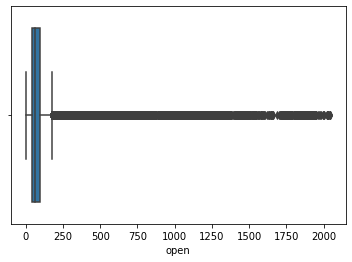

In [30]:
sns.boxplot(df['open'])

In [31]:
Q1 = df['open'].quantile(0.35)
Q3 = df['open'].quantile(0.65)
print(Q1,Q3)
iqr=Q3-Q1
iqr

48.44 78.79


30.35000000000001

In [32]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

124.31500000000003 93.965


In [33]:
df1 = df[df['open']<upper]
df1.shape

(533292, 7)

<AxesSubplot:xlabel='open'>

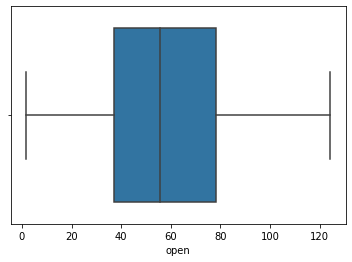

In [34]:
sns.boxplot(df1['open'])

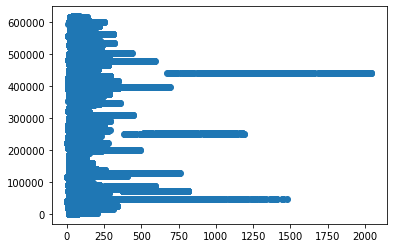

In [35]:
plt.scatter(df['open'],df.index)

<AxesSubplot:xlabel='high'>

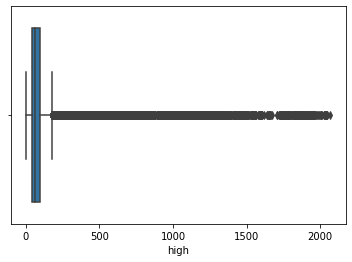

In [36]:
sns.boxplot(df['high'])

In [37]:
Q1 = df['high'].quantile(0.35)
Q3 = df['high'].quantile(0.65)
print(Q1,Q3)
iqr=Q3-Q1
iqr

48.89999999999999 79.47


30.570000000000007

In [38]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

125.32500000000002 94.755


In [39]:
df1 = df[df['high']<upper]
df1.shape

(533191, 7)

<AxesSubplot:xlabel='high'>

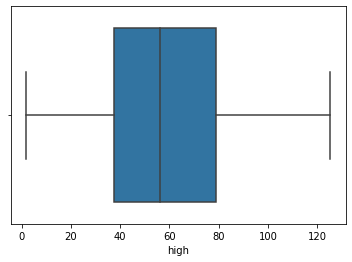

In [40]:
sns.boxplot(df1['high'])

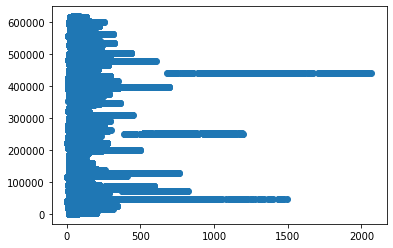

In [41]:
plt.scatter(df['high'],df.index)

<AxesSubplot:xlabel='low'>

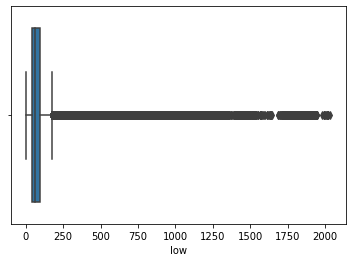

In [42]:
sns.boxplot(df['low'])

In [43]:
Q1 = df['low'].quantile(0.35)
Q3 = df['low'].quantile(0.65)
print(Q1,Q3)
iqr=Q3-Q1
iqr

47.98 78.1


30.119999999999997

In [44]:
upper = Q3+1.5*iqr
lower = Q1+1.5*iqr
print(upper,lower)

123.27999999999999 93.16


In [45]:
df1 = df[df['low']<upper]
df1.shape

(533387, 7)

<AxesSubplot:xlabel='low'>

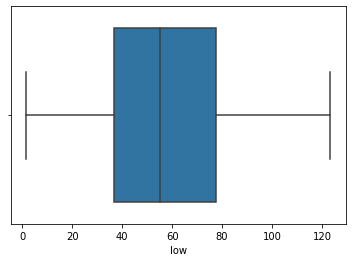

In [46]:
sns.boxplot(df1['low'])

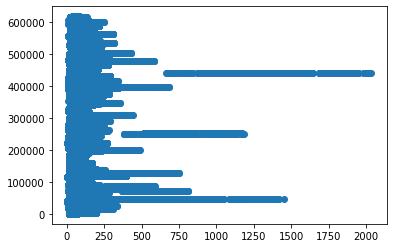

In [47]:
plt.scatter(df['low'],df.index)

In [48]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 6.8 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [49]:
import sweetviz as sv

advert_report = sv.analyze(df)

advert_report.show_html('EDA.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
